0	1	2	3	4	5	6	7	8	9	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	26	27	28	29	30	31	32	33	34	35	36	37	38	39	40	41	42	43	44	45	46	47	48	49	50	51	52	53	54	55	56	57	58	59	60	61	62	63	64	65	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82	83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103	104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120	121	122	123	124	125	126	127	128	129	130	131	132	133	134	135	136	137	138	139	140	141	142	143	144	145	146	147	148	149	150	151	152	153	154	155	156	157	158	159	160	161	162	163	164	165	166	167	168	169	170	171	172	173	174	175	176	177	178	179	180	181	182	183	184	185	186	187	188	189	190	191	192	193	194	195	196	197	198	199	200	201	202	203	204	205	206	207	208	209	210	211	212	213	214	215	216	217	218	219	220	221	222	223	224	225	226	227	228	229	230	231	232	233	234	235	236	237	238	239	240	241	242	243	244	245	246	247	248	249	250	251	252	253	254	255	256	257	258	259	260	261	262	263	264	265	266	267	268	269	270	271	272	273	274	275	276	27

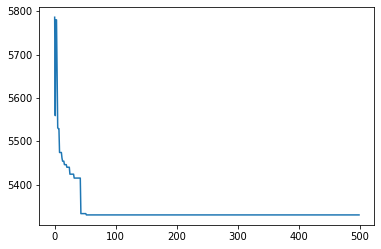

The best path: 
[25, 3, 19, 4, 30, 38, 20, 35, 42, 39, 40, 2, 45, 43, 47, 37, 24, 15, 10, 12, 31, 5, 33, 8, 26, 28, 7, 29, 48, 11, 36, 6, 22, 21, 17, 27, 32, 9, 14, 16, 13, 1, 44, 41, 46, 18, 34, 23]
The best value: 
5330.0
time cost 147.52334308624268 s


In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import time

cityNum = 48    # 城市数量
G = 100         # 种群规模
pc = 0.8        # 交叉概率
pm = 0.1     # 变异概率
N_GENERATIONS = 500    # 迭代次数
N_LOCAL = 80      # 局部搜索次数
datapath = "gr" + str(cityNum) + ".txt"

class chromosome():
    path = []
    value = 0.0

# 距离信息
cityDistance = [[0 for i in range(cityNum)]for j in range(cityNum)]
allPop = []     # 种群
selectPop = []  # 交叉后的种群
bestIndividual = chromosome()  # 最优个体
bestIndividualList = []  # 每代最好个value

# class chromosome(object):
#     def __init__(self,path,value):
#         self.path = path
#         self.value = value

# 交换列表两个元素
def swap(list, i ,j):
    list[i], list[j] = list[j], list[i]
    return list

def cmp(chromosome):
    return chromosome.value

# 获取城市信息
def getData(datapath):
    global cityDistance

    with open(datapath, "r") as f:  # 打开文件
        city = f.read()  # 读取文件
    city = city.split()
    count = 0
    for i in range(cityNum):
        for j in range(i + 1):
            cityDistance[i][j] = int(city[count])
            cityDistance[j][i] = int(city[count])
            count += 1
    # return cityweight

# 获取适应度值
def getValue(chromosome):
    global cityDistance

    value = 0.0
    for i in range(cityNum-1):
        value += cityDistance[chromosome.path[i]-1][chromosome.path[i+1]-1]
    value += cityDistance[chromosome.path[cityNum - 1] - 1][chromosome.path[0] - 1]

    return value

# 初始种群
def initPopulation():
    global allPop

    allPop.clear()
    init = [i+1 for i in range(cityNum)]

    random.shuffle(init)

    for i in range(G):
        temp_chromosome = chromosome()
        random.shuffle(init)
        temp_chromosome.path = init
        temp_chromosome.value = getValue(temp_chromosome)
        allPop.append(temp_chromosome)

# 交叉算子
def crossover():
    global selectPop
    global allPop

    selectPop.clear()
    random.shuffle(allPop)
    for i in range(len(allPop)):
        selectPop.append(allPop[i])
    select = []
    for i in range(G):
        chooseRate = np.random.rand()
        if chooseRate < pc:
            select.append(i)

    for i in range(0, len(select)-1, 2):
        commenA = []
        commenB = []
        A = allPop[select[i]].path
        B = allPop[select[i+1]].path
        pointOne = np.random.randint(0, cityNum)
        pointTwo = np.random.randint(0, cityNum)
        while pointOne == pointTwo:
            pointTwo = np.random.randint(0, cityNum)

        for j in range(min(pointOne, pointTwo), max(pointOne, pointTwo)):
            commenA.append(A[j])
            commenB.append(B[j])

        generationA = []
        chromosomeA = chromosome()
        length = 0
        for j in range(len(A)):
            if length == min(pointOne, pointTwo):
                for k in range(len(commenB)):
                    generationA.append(commenB[k])
                    length += 1

            if A[j] not in commenB:
                generationA.append(A[j])
                length += 1
        chromosomeA.path = generationA

        generationB = []
        chromosomeB = chromosome()
        length = 0
        for j in range(len(B)):
            if length == min(pointOne, pointTwo):
                for k in range(len(commenA)):
                    generationB.append(commenA[k])
                    length += 1

            if B[j] not in commenA:
                generationB.append(B[j])
                length += 1
        chromosomeB.path = generationB

        chromosomeA.value = getValue(chromosomeA)
        chromosomeB.value = getValue(chromosomeB)
        selectPop.append(chromosomeA)
        selectPop.append(chromosomeB)

# 变异算子 单点交换交叉
def multiple():
    global selectPop
    global allPop

    length = len(selectPop)
    # generation = chromosome()
    for i in range(length):
        chooseRate = np.random.rand()
        if chooseRate < pm:
            # generation = chromosome()
            generation = selectPop[i]
            pointOne = np.random.randint(0, cityNum)
            pointTwo = np.random.randint(0, cityNum)
            while pointOne == pointTwo:
                pointTwo = np.random.randint(0, cityNum)
            swap(generation.path, pointOne, pointTwo)
            # generation.path[pointOne], generation.path[pointTwo] = generation.path[pointTwo], generation.path[pointOne]
            generation.value = getValue(generation)
            selectPop.append(generation)

# 选择算子
def select():
    global selectPop
    global allPop

    allPop.clear()
    random.shuffle(selectPop)
    length = len(selectPop)

    for i in range(G-5):
        pointOne = np.random.randint(0, length)
        pointTwo = np.random.randint(0, length)
        if pointTwo == pointOne:
            allPop.append(selectPop[pointOne])
        else:
            if selectPop[pointOne].value < selectPop[pointTwo].value:
                allPop.append(selectPop[pointOne])
            else:
                allPop.append(selectPop[pointTwo])
    selectPop.sort(key=cmp)
    for i in range(5):
        allPop.append(selectPop[i])

# 局部搜索
def localSearch():
    global allPop
    global bestIndividual

    length = len(allPop)
    # allLocal = []

    for i in range(length):
        generation = allPop[i]
        # value = allPop[i].value
        for j in range(cityNum):
            distance = np.random.randint(1, cityNum-1)
            for k in range(cityNum-distance):
                value = generation.value
                swap(generation.path, k, k+distance)
                generation.value = getValue(generation)
                if(generation.value >= value):
                    swap(generation.path, k, k+distance)
                    # generation.value =value
                    generation.value = getValue(generation)
        allPop[i] = generation
    allPop.sort(key=cmp)
    bestIndividual = allPop[0]
    random.shuffle(allPop)

# 输出最优路径和路径长度
def printBest():
    global bestIndividual

    print("The best path: ")
    print(bestIndividual.path)
    print("The best value: ")
    print(bestIndividual.value)

# TSP
def train():
    global allPop
    global selectPop
    global bestIndividual
    global bestIndividualList

    getData(datapath)
    initPopulation()
    for i in range(N_GENERATIONS):
        print(i, end = '\t')
        crossover()
        multiple()
        select()
        if i < N_LOCAL:
            localSearch()
        temp_best = min(allPop, key=cmp)
        bestIndividual = temp_best
        bestIndividualList.append(bestIndividual.value)
    print(bestIndividualList)
    plt.plot(bestIndividualList)
    plt.show()
    printBest()

if __name__ == '__main__':
    #np.random.seed(0)
    time_start = time.time()  # 开始计时
    train()
    time_end = time.time()  # 结束计时
    time = time_end - time_start  # 运行所花时间
    print('time cost', time, 's')

In [ ]:
0.05 5439.0 
0.2  5357.0
0.3  5274.0
0.4  6725.0
0.1   5130.0